In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

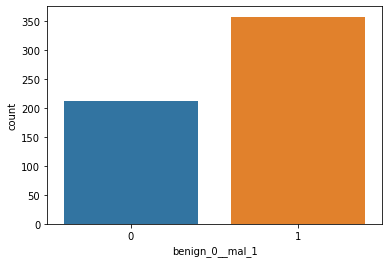

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

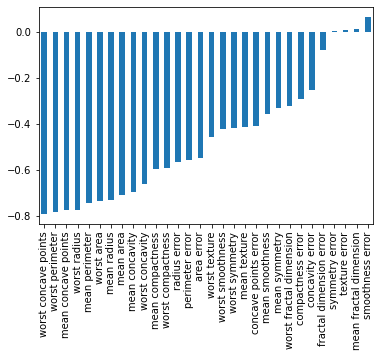

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

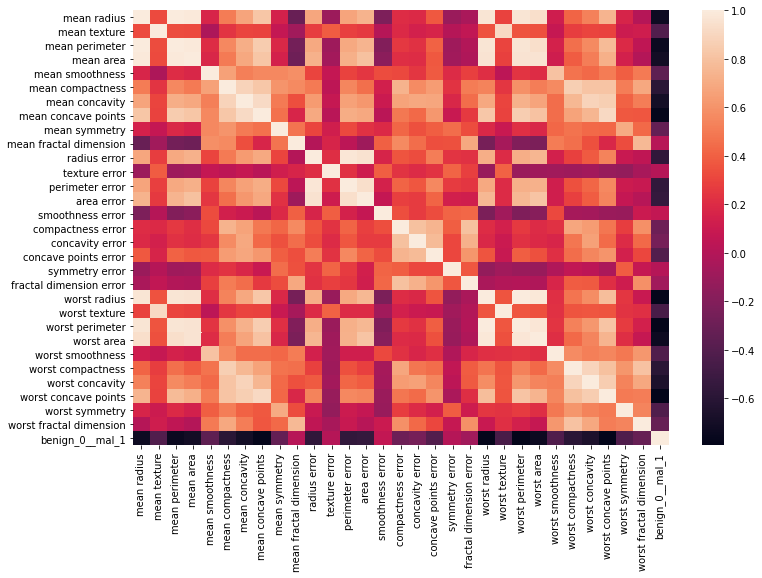

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler 

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout

In [33]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#binary classification uses sigmoid.
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [34]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6599 - val_loss: 0.6403
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6128 - val_loss: 0.5936
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5702 - val_loss: 0.5493
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5265 - val_loss: 0.5037
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4843 - val_loss: 0.4595
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4430 - val_loss: 0.4170
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4034 - val_loss: 0.3770
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3666 - val_loss: 0.3374
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3322 - val_loss: 0.3044
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3035 - val_loss: 0.2751
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0497 - val_loss: 0.1155
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0497 - val_loss: 0.1170
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0493 - val_loss: 0.1211
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.1206
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1127
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0487 - val_loss: 0.1181
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.1157
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1201
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0494 - val_loss: 0.1124
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.1258
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.1274
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1488
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0364 - val_loss: 0.1378
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.1355
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0341 - val_loss: 0.1395
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0341 - val_loss: 0.1381
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.1372
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1331
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0321 - val_loss: 0.1434
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.1302
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.1433
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.1537
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.1431
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.1385
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.1485
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.1417
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.1426
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.1564
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.1507
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.1451
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.1440
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.1629
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.1539
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.1373
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.1500
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.1519
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.1444
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.1794
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.1467
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.1346
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.1446
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.1837
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.1404
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0360 - val_loss: 0.1944
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.1368
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.1633
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.1431
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.1446
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.1612
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.1442
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.1760
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.1515
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.1868
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.1502
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.1689
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.1457
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.2104
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.1538
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.1560
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.2033
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.1852
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.1910
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.1906
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.1792
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.1895
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.1900
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.1740
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.1782
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.1941
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.1890
Epoc

In [35]:
losses =pd.DataFrame(model.history.history)

<AxesSubplot:>

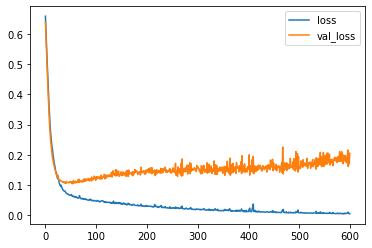

In [36]:
losses.plot()

In [37]:
#implementing callbacks(early_stopping) after this point
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#binary classification uses sigmoid.
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [40]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6620 - val_loss: 0.6400
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6181 - val_loss: 0.6023
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5818 - val_loss: 0.5618
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5414 - val_loss: 0.5191
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4988 - val_loss: 0.4698
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4492 - val_loss: 0.4217
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4018 - val_loss: 0.3686
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3552 - val_loss: 0.3209
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3210 - val_loss: 0.2856
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2904 - val_loss: 0.2612
Epoch 11/

In [41]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

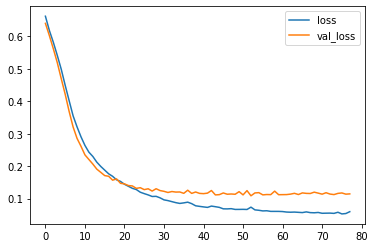

In [42]:
model_loss.plot()

In [49]:
#implementing Dropouts
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#binary classification uses sigmoid.
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [50]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6835 - val_loss: 0.6594
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6527 - val_loss: 0.6313
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6402 - val_loss: 0.6040
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6140 - val_loss: 0.5768
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5967 - val_loss: 0.5494
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5865 - val_loss: 0.5263
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5347 - val_loss: 0.4956
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5265 - val_loss: 0.4559
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4974 - val_loss: 0.4199
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4799 - val_loss: 0.3914
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0936 - val_loss: 0.0858
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0844 - val_loss: 0.0900
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1069 - val_loss: 0.0876
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1083 - val_loss: 0.0930
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1157 - val_loss: 0.0863
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0974 - val_loss: 0.0955
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1193 - val_loss: 0.0802
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.0829
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1038 - val_loss: 0.0902
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1218 - val_loss: 0.0800


In [51]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

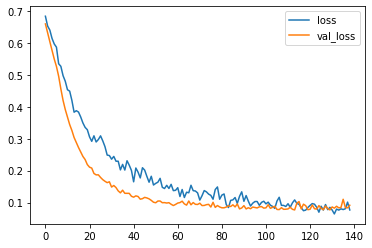

In [52]:
model_loss.plot()

In [66]:
#predict_classes function is depreciated and will be removed next year, so we are going to use the argument
#model.predict_classes(X_test)>0.5 for sigmoid classification and for softmax 
#np.argmax(model.predict(X_test))
model.predict_classes(X_test)

5/5 - 0s


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [61]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]


In [ ]:
pd.read_csv()